 # denoising images

## retirando ruidos de imagens

### o famoso ruído sal e pimenta sendo trabalhado com filtro de mediana

Neste trabalho, o algoritmo filtro de ruído para retirar o ruído de quadros de pixels 3x3 foi feito pela gente, com isso, ele ainda apresenta falhas.

Falhas estas que também foram estudadas para poder serem retiradas também de maneira posterior.

O codigo inteiro está no arquivo chamado ```denoise.py```

Ele está inteiramente comentado, explicando cada parte do trabalho e como ele faz para o trabalho completo 

criamos 5 funções importantes, e iremos apresentar-las abaixo :
<br>
<hr>

• ```cizando``` -> deixa a imagem cinza para poder ser trabalhada de maneira mais fácil. 
<br><br>
• ```adicionar_ruido``` -> adiciona o ruido sal e pimenta sobre 2 modos: <br>
"s": adiciona só sal (pixel[x][y] = 255).
<br>
"p": adiciona só a pimenta (pixel[x][y] = 0). (o filtro mediana chora)
<br>
"p&s": adiciona os dois 
<!-- ainda pode ser deifinido o grau (taxa de quantidade de pixels) presentes na imagem, de 0 a 1, (cuidado, grau > 1, pode danificar a imagem toda. Ex: 0.5, pode variar apenas 50% dos pixels aleatórios da imagem.
 -->
<br>

• ```plt_169```-> faz a plotagem da matriz da imagem em 16x9
<br><br>
• ```mediana2D```-> organiza o pixel 3x3 em uma dimensão e em seguida tira a sua mediana (isso poderia ser feito com o numpy, mas como é a mediana, e o trabalho fala dele resolvi fazer na mão msm)
<br><br>
• ```mediana2D_filtro``` -> usa a mediana2D para tirar a mediana do pixel 3x3 e assim, de acordo com o modo que é usado, filtra o pixel e o retorna limitado de acordo com o que se é pedido (é aqui se encontra, toda a magia do código).
<br>
modos:<br>
"T" -> filtra pela distância em que o módulo do valor do pixel estiver da mediana encontrada, independente se o valor do pixel for maior ou igual a mediana. Se a distância do valor do pixel para a mediana for maior que o valor do limite determinado pelo usuário no parâmetro T, o novo valor do pixel será o da mediana da matriz pixel 3x3.
<br>
"med" -> filtra somente pela mediana. Se o valor so pixel for maior do que o da mediana da matriz, o novo valor desse pixel será o da mediana.
<br>
<b>Nota:</b> A med não consegue tirar a pimenta da imagem, pois são valores pequenos (tpo, o próprio zero). Só o T, que consegue fazer algo legal, mas com muita pixelagem em jogo. <br> Se vc for usar um ruído mais ameno, ou controlado, poderá brincar com isso numa boa, <b>mas nunca use o ruído gaussiano nisso</b>, pois só <b>Fourier</b> ou algo parecido para brincar com isso também.
<br><br>
• ```filtrar_img``` -> Principal função do jogo. <br> é aqui em vc vai jogar a sua imagem e torcer para que ela seja. É isso. <br>
<b>Nota:</b> O reshape que é usado para alterar o formato da imagem cinza de (X,Y) para (X * Y / D², D, D), no nosso caso, D=3, infelizmente é o do numpy, pois eu tentei criar um algoritmo top para isso, mas não consegui ;-;. 

<hr>

## começando a brincar

vamos começar importando a biblioteca cv2 eo arquivo denoise



In [1]:
import denoise as dn
import cv2

In [2]:
img = cv2.imread('test.png')

In [43]:
import matplotlib.pyplot as plt
import numpy as np

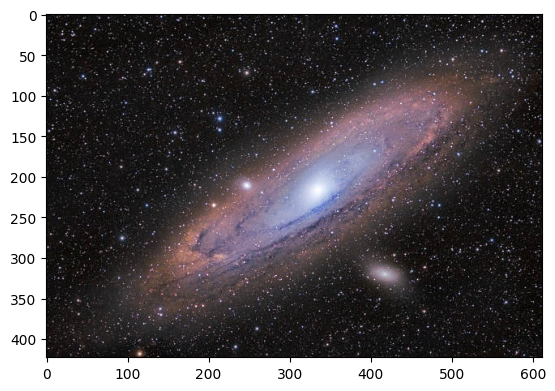

In [4]:
plt.imshow(img)

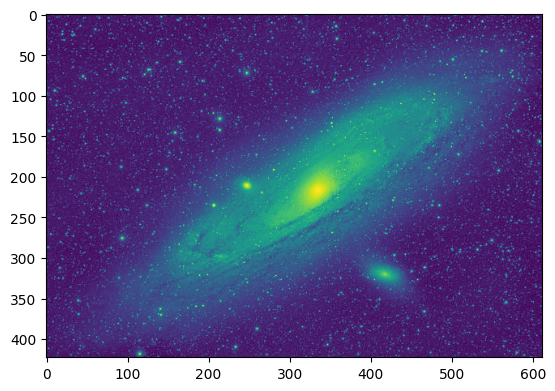

In [5]:
img = dn.cinzando(img)
plt.imshow(img)

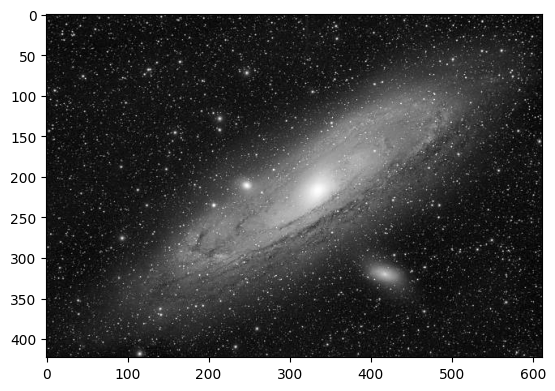

In [55]:
plt.imshow(img,cmap="gray")

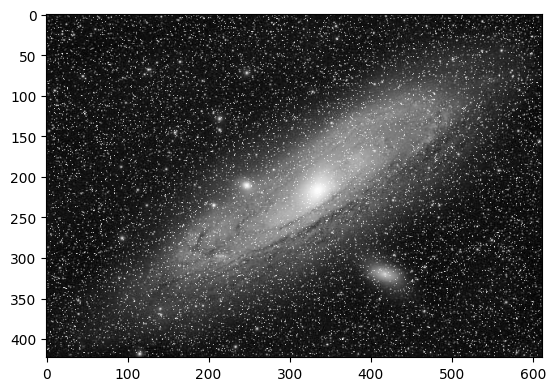

In [54]:
img_r = dn.adicionar_ruido(img)

plt.imshow(img_r,cmap='gray')
plt.show()

então...
foi... sheipado


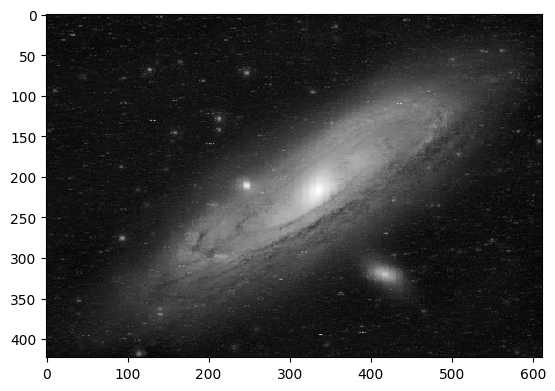

In [53]:
img_nova_m = dn.retirar_ruido(img_r,prt=False)

plt.imshow(img_nova_m,cmap="gray")
plt.show()

In [49]:
cv2.imwrite('ruido_img.png',img_r)
cv2.imwrite('img_gray.png',img)
cv2.imwrite('img_den.png',img_nova_m)

True

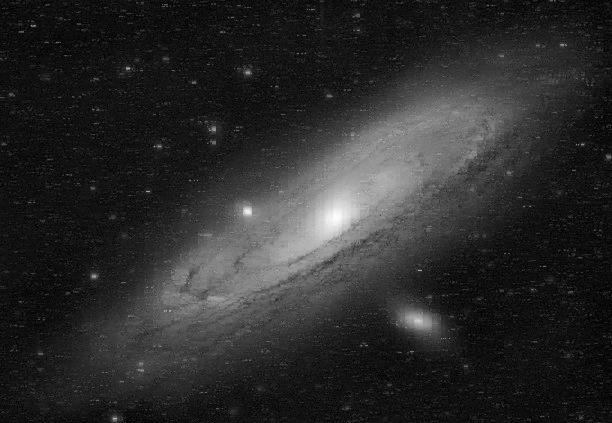

In [20]:
import PIL as pl
img_rp =pl.Image.open('ruido_img.png')
img_rp

In [56]:
img_p = pl.Image.open('img_gray.png')
img_rp =pl.Image.open('ruido_img.png')
img_dp = pl.Image.open('img_den.png')

imgR = (img_rp.histogram())
imgG = (img_p.histogram())
imgD = img_dp.histogram()

/tmp/ipykernel_37873/3298034979.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


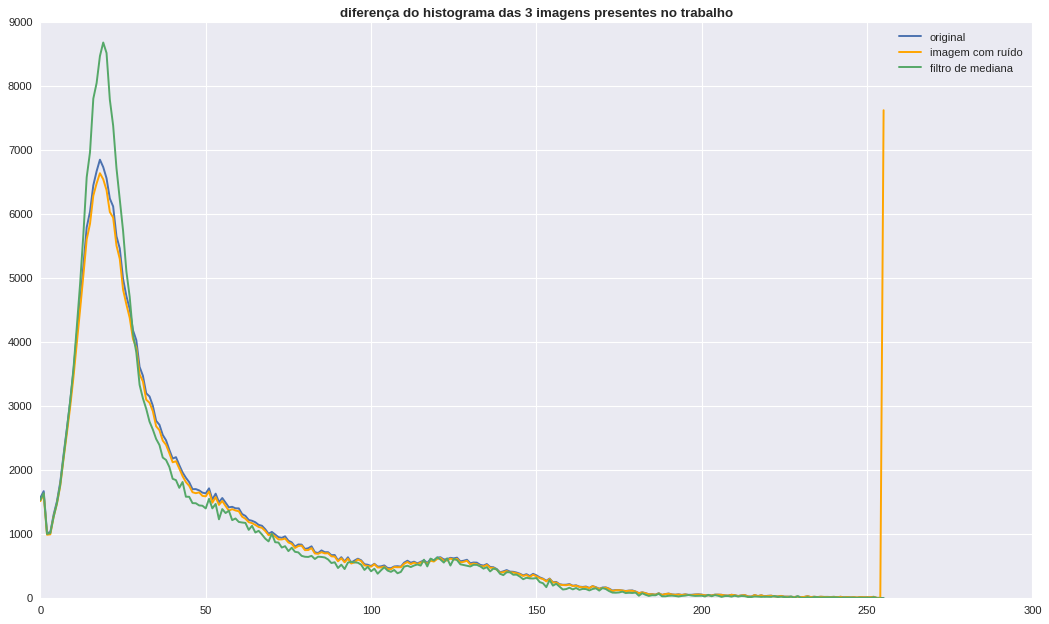

In [96]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(16,9))
plt.plot(imgG,label='original')
plt.plot(imgR,label='imagem com ruído',c='orange')
plt.plot(imgD,label='filtro de mediana')
plt.title('diferença do histograma das 3 imagens presentes no trabalho',fontweight='bold')
plt.legend()

plt.savefig('histo_geral.png',dpi=800)

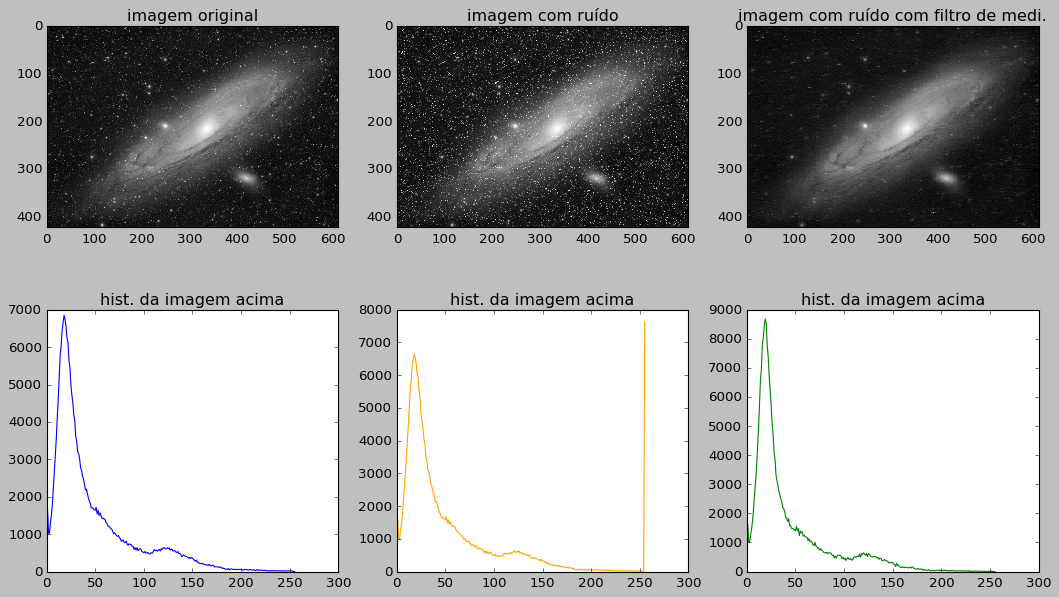

In [97]:
plt.style.use('classic')

fig,axs = plt.subplots(ncols=3,nrows=2,figsize=(16,9))

axs[0][0].imshow(img,'gray')
axs[0][0].set_title('imagem original')

axs[0][1].imshow(img_r,'gray')
axs[0][1].set_title('imagem com ruído')

axs[0][2].imshow(img_nova_m,'gray')
axs[0][2].set_title('imagem com ruído com filtro de medi.')

axs[1][0].plot(imgG,c='blue')
axs[1][0].set_title('hist. da imagem acima')


axs[1][1].plot(imgR,c='orange')
axs[1][1].set_title('hist. da imagem acima')

axs[1][2].plot(imgD,c='green')
axs[1][2].set_title('hist. da imagem acima')


plt.savefig('histo_blocs.png',dpi=800)

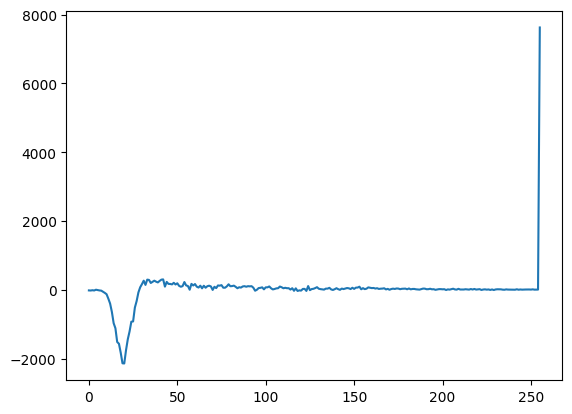

In [59]:
dif = np.array(imgR)-np.array(imgD)
plt.plot(dif)